In [21]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [22]:
class AgentState(TypedDict):
    """State for the agent."""
    num1 : int
    num2 : int
    operation : str
    result : int
    

In [23]:
def add_node(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['result'] = state['num1'] + state['num2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['result'] = state['num1'] - state['num2']
    return state

def decide_next_node(state: AgentState) -> str:
    """Decide the next node based on the operation."""
    if state['operation'] == '+':
        return 'addition'
    elif state['operation'] == '-':
        return 'subtraction'

In [24]:
graph = StateGraph(AgentState)

In [25]:


graph.add_node("router", lambda state: state)
graph.add_node('addition_node', add_node)
graph.add_node('subtraction_node', subtract_node)


"""
If you always want to go from node A to node B, you can use the add_edge method directly.
"""
graph.add_edge(START, "router")
""" 
    the add_conditional_edges requires three parameters:
    1. source = The starting node. This conditional edge will run when exiting this node.
    2. path = The callable that determines the next node or nodes. If not specifying path_map 
        it should return one or more nodes. If it returns END, the graph will stop execution.
    3. path_map = A dictionary that maps the output of the path callable to the next node.

"""
graph.add_conditional_edges(
    "router", 
    decide_next_node,
    {
        #edge : node
        "addition": "addition_node",
        "subtraction": "subtraction_node"
    }
)

graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)


In [27]:
app = graph.compile()

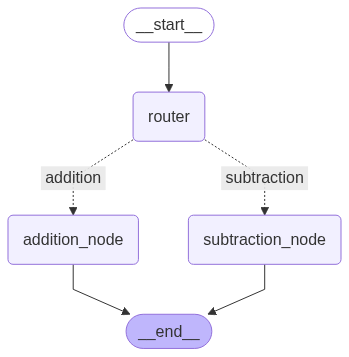

In [28]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
print(app.invoke(AgentState(num1=5, num2=3, operation='+')))

{'num1': 5, 'num2': 3, 'operation': '+', 'result': 8}
